In [1]:

import sys
import os
import scanpy as sc
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)

from package import DMG, clustering

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [1]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/H3K27ac_cluster13_19.h5ad'
adata=sc.read(adata_file)
print(adata)

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 9323 × 17159
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27ac', 'nFeature_H3K27ac', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27ac_clusters', 'n_genes', 'mclust', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image', 'RNA', 'ATAC'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_rp_16_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'RNA_colors', 'SpatialGlue_16_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors',

In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/'
adata_omics1 = sc.read_h5ad(file_fold + 'rna_clean.h5ad')
print(adata_omics1)
import anndata
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from rpy2.robjects.conversion import localconverter

# 加载R包
mclust = importr("mclust")

# 假设 X_pca 是降维后的数据（例如PCA坐标）
X_pca = adata_omics1.obsm["X_pca"][:, :40]  # 使用前20个主成分

# 转换为R矩阵
with localconverter(ro.default_converter + numpy2ri.converter):
    r_X_pca = ro.r.matrix(X_pca, nrow=X_pca.shape[0], ncol=X_pca.shape[1])

# 指定聚类数（例如强制分8类）
mclust_result = mclust.Mclust(r_X_pca, G=18)

clusters = np.array(mclust_result.rx2("classification"))
adata_omics1.obs["mclust_clusters"] = clusters.astype(int)
adata_omics1.obs["mclust_clusters"] = adata_omics1.obs["mclust_clusters"].astype('category')

AnnData object with n_obs × n_vars = 9323 × 17159
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27ac', 'nFeature_H3K27ac', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27ac_clusters', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    obsm: 'X_lsi', 'X_pca', 'X_umap', 'feat', 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


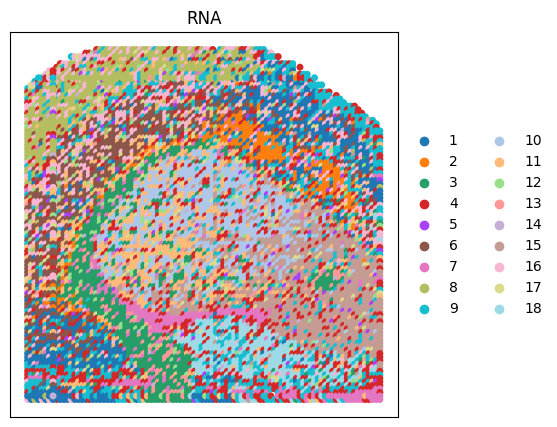

In [24]:
import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_ATAC/H3K27ac_RNA.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics1, basis='spatial', color='mclust_clusters', ax=ax, title='RNA', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()

In [4]:
adata.obs['RNA']=adata_omics1.obs['mclust_clusters']

In [5]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/'
adata_omics2 = sc.read_h5ad(file_fold + 'atac_clean.h5ad')
print(adata_omics2)
import anndata
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from rpy2.robjects.conversion import localconverter

mclust = importr("mclust")
X_pca = adata_omics2.obsm["X_pca"][:, :40]  

with localconverter(ro.default_converter + numpy2ri.converter):
  r_X_pca = ro.r.matrix(X_pca, nrow=X_pca.shape[0], ncol=X_pca.shape[1])

mclust_result = mclust.Mclust(r_X_pca, G=18)
clusters = np.array(mclust_result.rx2("classification"))
adata_omics2.obs["mclust_clusters"] = clusters.astype(int)
adata_omics2.obs["mclust_clusters"] = adata_omics2.obs["mclust_clusters"].astype('category')

AnnData object with n_obs × n_vars = 9323 × 104162
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27ac', 'nFeature_H3K27ac', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27ac_clusters'
    var: 'count', 'percentile', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    obsm: 'X_lsi', 'X_pca', 'X_umap', 'feat', 'spatial'


/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


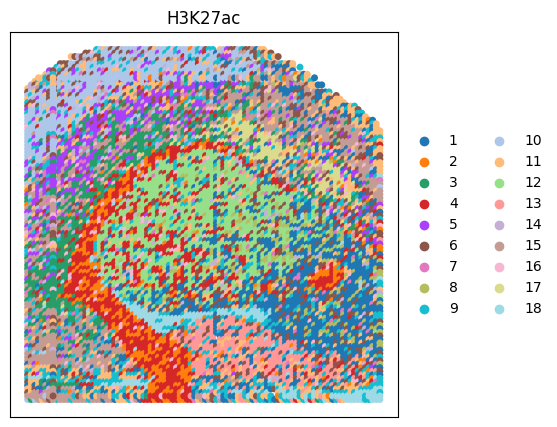

In [27]:
import matplotlib.pyplot as plt
output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_ATAC/H3K27ac_H3K27ac.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='mclust_clusters', ax=ax, title='H3K27ac', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig(output_path, format='png')  
plt.show()

In [6]:
adata.obs['ATAC']=adata_omics2.obs['mclust_clusters']

In [29]:
adata.write(adata_file)

In [166]:
import pandas as pd
#file_fold = "/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_ATAC/output_dmg/H3K27ac/"
file_fold = "/home/lixiangyu/DMG/DMG-main/output_dmg/H3K27ac/"

cluster = pd.read_csv(file_fold+'H3K27ac_1.0_0.2_0.6_50_mclust_DMG_label.csv')
adata.obs['no_image'] = cluster['mclust'].values
adata.write(adata_file)

In [167]:
import scanpy as sc
adata=sc.read(adata_file)
custom_colors = [
    
    '#D0D1CD',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#8F9D27',  
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
    
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
    '#87d5c6',  # tufen
    '#ab5326',  # Blue
    '#fecbe3',  # molv
    '#fcb359',  # tufen
    '#45d5b6',  # tufen
    '#ff7f50',
    '#ffd700',
    '#aaffcb',
    '#a0522d',
    
    
]

adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['SpatialGlue_18_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
adata.uns['MISO_rp_18_colors'] = custom_colors

adata.write(adata_file)

In [168]:
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')
adata.obs['SpatialGlue_18'] = adata.obs['SpatialGlue_18'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['MISO_rp_18'] = adata.obs['MISO_rp_18'].astype('category')
#adata.obs['MISO_5'] = adata.obs['MISO_5'].astype('category')

adata.write(adata_file)

In [2]:
print(adata)

AnnData object with n_obs × n_vars = 9323 × 17159
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27ac', 'nFeature_H3K27ac', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27ac_clusters', 'n_genes', 'mclust', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image', 'RNA', 'ATAC'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_rp_16_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'RNA_colors', 'SpatialGlue_16_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors',

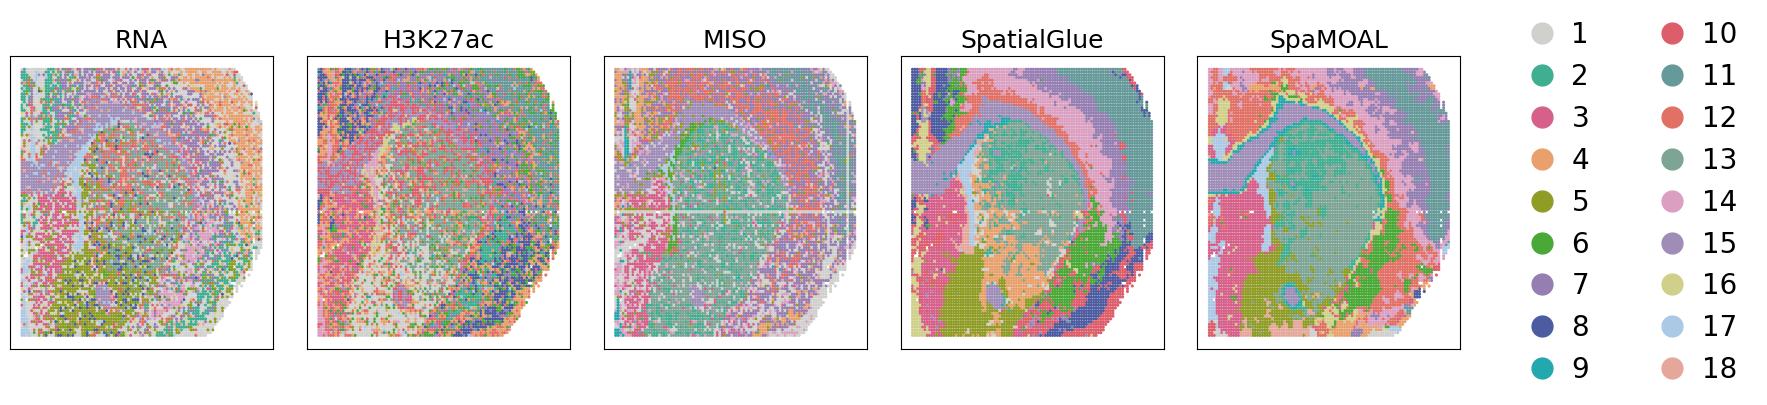

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')
adata.obsm['spatial_rotated'] = adata.obsm['spatial'].copy()
adata.obsm['spatial_rotated'][:, 0] = -adata.obsm['spatial'][:, 1]
adata.obsm['spatial_rotated'][:, 1] = adata.obsm['spatial'][:, 0]
# 创建图形和子图
fig, ax_list = plt.subplots(1, 6, figsize=(18, 4))
s_size = 20
sc.pl.embedding(adata, basis='spatial_rotated', color='RNA', title='RNA', ax=ax_list[0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='ATAC', title='H3K27ac', ax=ax_list[1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='MISO_rp_18', title='MISO', ax=ax_list[2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='SpatialGlue_18', title='SpatialGlue', ax=ax_list[3], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='no_image', title='SpaMOAL', ax=ax_list[4], s=s_size, show=False)


# 设置子图属性
for ax in ax_list:
    ax.set_title(ax.get_title(), fontsize=18)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 移除现有图例
    legend = ax.get_legend()
    if legend is not None:
        legend.remove()
    ax.invert_yaxis()
    ax.invert_xaxis()

# 定义图例颜色和标签
custom_legend = {

 '1':     '#D0D1CD',
 '2':    '#40AE91',
  '3':   '#D6608A',
  '4':   '#E8A16D',
  '5':   '#8F9D27',  
  '6':   '#49A836', 
  '7':   '#957EB2',  
  '8':   '#4D5BA0',  
  '9':   '#23A9AD', 
   '10':  '#DD5D6A',
    
  '11':   '#669999',
 '12':    '#E17065',
  
 '13':    '#7da494',  # Gold
 '14':    '#dba0c1',  # BlueViolet
 '15':    '#9f8db8',  # qianzi
 '16':    '#d0d08a',  # Blue
 '17':    '#abc8e5',  # molv
 '18':    '#e5a79a',  # tufen 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右侧添加图例
ax_list[5].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=2,
    handletextpad=0.05
)
ax_list[5].set_frame_on(False)  # 去除子图边框

plt.tight_layout(w_pad=0.8)
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_ATAC/H3K27ac_cluster_all_rotated.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [4]:
import pandas as pd
import scanpy as sc
list_RNA=[1,2,18,4,15,14,17,12,9,13,11,8,10,6,3,16,7,5]
list_RNA=[1,15,3,5,4,6,7,8,9,10,11,12,13,14,2,17,16,18]
adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
                      categories=list_RNA,
                      ordered=True)
list_ATAC=[1,2,7,4,15,6,3,10,9,8,12,11,13,14,5,16,17,18]
adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
                      categories=list_ATAC,
                      ordered=True)
list_SpatialGlue_18=[7,10,3,6,4,12,13,8,17,2,11,15,16,5,1,14,9,18]
adata.obs['SpatialGlue_18']  = pd.Categorical(adata.obs['SpatialGlue_18'], 
                      categories=list_SpatialGlue_18,
                      ordered=True)
list_MISO_rp_18=[0,5,16,2,12,14,3,11,10,9,8,7,4,13,1,15,17,6]
adata.obs['MISO_rp_18']  = pd.Categorical(adata.obs['MISO_rp_18'], 
                      categories=list_MISO_rp_18,
                      ordered=True)  
list_no_image=[18,3,8,4,15,14,13,16,9,10,7,5,12,6,1,2,17,11]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)  
                                         

In [69]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import scanpy as sc
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import subprocess
import time
import os
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
import sys
import os
import pandas as pd
import scanpy as sc
import sys
import re
import torch
import multiprocessing
def calculate_icc(cluster_labels, data):
    unique_clusters = np.unique(cluster_labels)
    icc_values = []

    for cluster in unique_clusters:
        # 筛选出当前聚类的数据
        cluster_data = data[cluster_labels == cluster]
        # 计算当前聚类的组内方差
        within_cluster_variance = np.var(cluster_data, axis=0).mean()

        # 计算所有聚类均值
        all_cluster_means = []
        for other_cluster in unique_clusters:
            other_cluster_data = data[cluster_labels == other_cluster]
            other_cluster_mean = np.mean(other_cluster_data, axis=0)
            all_cluster_means.append(other_cluster_mean)
        all_cluster_means = np.array(all_cluster_means)
        # 计算各聚类均值之间的方差
        across_cluster_variance = np.var(all_cluster_means, axis=0).mean()

        # 计算ICC
        icc = within_cluster_variance / (within_cluster_variance + across_cluster_variance)
        icc_values.append(icc)

    return icc_values

In [72]:
num_gpus = 4
# RNA
adata_omics1=sc.read('/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/rna_clean.h5ad')
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_rna = adata.obsm['X_pca']

data = pd.read_csv('/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/H3K27ac_GeneScoreMatrix_HVG3000.csv',index_col=0)
print(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)
pca = PCA(n_components=50)
pca50_atac = pca.fit_transform(data_scaled)
    

                  Mir297a.2  Snord87  Mir466b.1  Mir467c  Mir669a.3  Snord73a  \
GAGCTGAACGGAAGAA        0.0    1.026        0.0      0.0        0.0     0.000   
TCTTCACAGTGTTCTA        0.0    0.274        0.0      0.0        0.0     0.000   
TGGAACAAGGTGCGAA        0.0    0.210        0.0      0.0        0.0     0.000   
CCTAATCCGCCAAGAC        0.0    0.000        0.0      0.0        0.0     0.594   
GTGTTCTAGTGTTCTA        0.0    0.000        0.0      0.0        0.0     0.603   
...                     ...      ...        ...      ...        ...       ...   
ATCCTGTAAGTACAAG        0.0    0.000        0.0      0.0        0.0     0.000   
ACCTCCAACGCTGATC        0.0    0.000        0.0      0.0        0.0     0.000   
CAAGACTAAACAACCA        0.0    0.000        0.0      0.0        0.0     0.000   
CAAGACTACACCTTAC        0.0    0.000        0.0      0.0        0.0     0.000   
CAGCGTTAAACGTGAT        0.0   62.448        0.0      0.0        0.0     0.000   

                   Tstd1  M

In [73]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27ac/H3K27ac_cluster13_19.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 9323 × 17159
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27ac', 'nFeature_H3K27ac', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27ac_clusters', 'n_genes', 'mclust', 'SpatialGlue_13', 'SpatialGlue_14', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image', 'RNA', 'ATAC'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_rp_16_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'RNA_colors', 'SpatialGlue_16_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors',

In [75]:
import pandas as pd
file_fold = "/home/lixiangyu/DMG/DMG-main/output_dmg/H3K27ac/"
labels_none = pd.read_csv(file_fold+'H3K27ac_1.0_0.2_0.6_50_mclust_DMG_label.csv')
a = pd.DataFrame(labels_none)
labels_none = a['cluster_result']
labels_SpatialGlue=adata.obs['SpatialGlue_18']
labels_MISO=adata.obs['MISO_rp_18']

In [76]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO, pca50_rna), end=",")
print()
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO, pca50_atac), end=",")
print()

rna
[0.72685033, 0.5484361, 0.6107188, 0.57752293, 0.56750625, 0.561509, 0.62787616, 0.58937275, 0.9625058, 0.6790377, 0.61589056, 0.5870702, 0.5992731, 0.8634084, 0.581596, 0.56294197, 0.845367, 0.7924732],
[0.27096722, 0.4483953, 0.28985363, 0.3042036, 0.2872659, 0.29723006, 0.0, 0.27402988, 0.29816976, 0.0, 0.80157125, 0.0, 0.5021233, 0.43371323, 0.7764437, 0.0, 0.3626611, 0.9307929],
atac
[0.9912580218564518, 0.9985703806014217, 0.9973121348650705, 0.9988199662718259, 0.9990734061941485, 0.995960725919967, 0.9945848726594722, 0.9989060794335854, 0.9922780454591756, 0.9903032474249304, 0.9977550614168839, 0.9983034883557417, 0.9977005783810873, 0.9985821308077049, 0.9973877266095712, 0.9917754236971469, 0.9854879361739219, 0.9915873877234123],
[0.9684888814395346, 0.8762833660385604, 0.9867456857086474, 0.9767751679960492, 0.9523819874587593, 0.9603804248208381, 0.0, 0.9476712637032043, 0.9836688115508467, 0.0, 0.9910799710634068, 0.0, 0.9691077430147695, 0.9666829619675765, 0.89881

In [77]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO, pca50_rna), end=",")
print()
print(calculate_icc(labels_none, pca50_rna), end=",")
print()
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO, pca50_atac), end=",")
print()
print(calculate_icc(labels_none, pca50_atac), end=",")
print()

rna
[0.72685033, 0.5484361, 0.6107188, 0.57752293, 0.56750625, 0.561509, 0.62787616, 0.58937275, 0.9625058, 0.6790377, 0.61589056, 0.5870702, 0.5992731, 0.8634084, 0.581596, 0.56294197, 0.845367, 0.7924732],
[0.27096722, 0.4483953, 0.28985363, 0.3042036, 0.2872659, 0.29723006, 0.0, 0.27402988, 0.29816976, 0.0, 0.80157125, 0.0, 0.5021233, 0.43371323, 0.7764437, 0.0, 0.3626611, 0.9307929],
[0.8080831, 0.7518874, 0.7488863, 0.68682647, 0.67910767, 0.68835485, 0.70416635, 0.7235043, 0.86165553, 0.9224771, 0.6793845, 0.6726716, 0.6958516, 0.7119892, 0.6829252, 0.37771583, 0.9526679, 0.7978948],
atac
[0.9912580218564518, 0.9985703806014217, 0.9973121348650705, 0.9988199662718259, 0.9990734061941485, 0.995960725919967, 0.9945848726594722, 0.9989060794335854, 0.9922780454591756, 0.9903032474249304, 0.9977550614168839, 0.9983034883557417, 0.9977005783810873, 0.9985821308077049, 0.9973877266095712, 0.9917754236971469, 0.9854879361739219, 0.9915873877234123],
[0.9684888814395346, 0.87628336603856

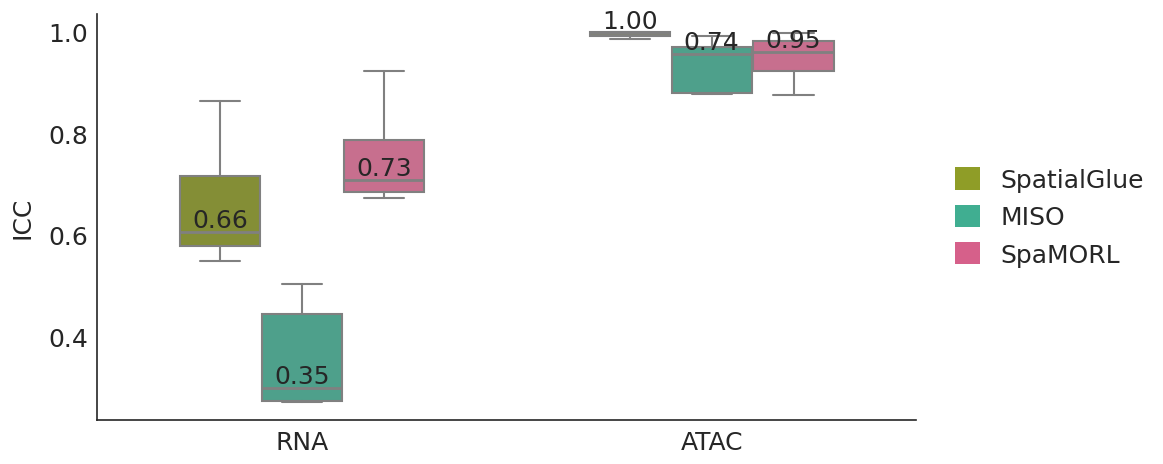

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# 设置全局样式
sns.set_style("white")  # 白色背景
plt.rcParams['font.size'] = 18
# 数据准备

data_rna = [
    [0.72685033, 0.5484361, 0.6107188, 0.57752293, 0.56750625, 0.561509, 0.62787616, 0.58937275, 0.9625058, 0.6790377, 0.61589056, 0.5870702, 0.5992731, 0.8634084, 0.581596, 0.56294197, 0.845367, 0.7924732],
    [0.27096722, 0.4483953, 0.28985363, 0.3042036, 0.2872659, 0.29723006, 0.0, 0.27402988, 0.29816976, 0.0, 0.80157125, 0.0, 0.5021233, 0.43371323, 0.7764437, 0.0, 0.3626611, 0.9307929],
    [0.8080831, 0.7518874, 0.7488863, 0.68682647, 0.67910767, 0.68835485, 0.70416635, 0.7235043, 0.86165553, 0.9224771, 0.6793845, 0.6726716, 0.6958516, 0.7119892, 0.6829252, 0.37771583, 0.9526679, 0.7978948],
]

data_atac = [
   [0.9912580218564518, 0.9985703806014217, 0.9973121348650705, 0.9988199662718259, 0.9990734061941485, 0.995960725919967, 0.9945848726594722, 0.9989060794335854, 0.9922780454591756, 0.9903032474249304, 0.9977550614168839, 0.9983034883557417, 0.9977005783810873, 0.9985821308077049, 0.9973877266095712, 0.9917754236971469, 0.9854879361739219, 0.9915873877234123],
    [0.9684888814395346, 0.8762833660385604, 0.9867456857086474, 0.9767751679960492, 0.9523819874587593, 0.9603804248208381, 0.0, 0.9476712637032043, 0.9836688115508467, 0.0, 0.9910799710634068, 0.0, 0.9691077430147695, 0.9666829619675765, 0.8988158522294402, 0.0, 0.9689341077182956, 0.8850338867887024],
    [0.8757763404817972, 0.9342575204142585, 0.8933714781026694, 0.9968017276920529, 0.9531815530265166, 0.9670491384119073, 0.9807331736552363, 0.952317062538805, 0.8785751644192052, 0.9832416610984164, 0.9920960535600174, 0.9194149744451059, 0.9839333855917648, 0.959303702254432, 0.9771588026165798, 0.9161864026154407, 0.9610246628815481, 0.9980906264819848],
]

methods = ['SpatialGlue', 'MISO', 'SpaMORL']

# 转换为DataFrame
dfs = []
for data, data_type in zip([data_rna, data_atac], ['rna', 'atac']):
    for i, row in enumerate(data[:len(methods)]):
        df = pd.DataFrame({
            'type': data_type,
            'method': [methods[i]] * len(row),
            'value': row
        })
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# 自定义颜色
palette = {
    'SpatialGlue': '#8F9D27',  # 蓝色
    'MISO': '#40AE91',         # 橙色
    'SpaMORL': '#D6608A'       # 绿色
}

# 创建图形
plt.figure(figsize=(12, 5))
ax = sns.boxplot(
    x='type', 
    y='value', 
    hue='method', 
    data=df, 
    palette=palette,
    showfliers=False,
    linewidth=1.5,
    width=0.6,
    boxprops=dict(edgecolor='gray'),  # 箱体边框颜色
    whiskerprops=dict(color='gray'),  # 须线颜色
    capprops=dict(color='gray'),      # 须线末端横线颜色
    medianprops=dict(color='gray', linewidth=2)  # 中位数线颜色
)

# 计算并添加均值标签
grouped_mean = df.groupby(['type', 'method'])['value'].mean()
for i, ((category, method), mean_val) in enumerate(grouped_mean.items()):
    tick_index = list(df['type'].unique()).index(category)
    box_offset = list(palette.keys()).index(method) - (len(palette)-1)/2
    x = tick_index + box_offset * 0.2  # 调整位置
    y = df[(df['type']==category) & (df['method']==method)]['value'].median()
    ax.text(x, y, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=18)

# 美化图形
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)

# 调整图例
handles, labels = ax.get_legend_handles_labels()
# 创建正方形图例
legend_elements = [Patch(facecolor=palette[method], edgecolor='none', label=method) 
                  for method in methods]

# 调整图例
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(1.02, 0.5),
    loc='center left',
    frameon=False,
    handlelength=1.0,
    handleheight=1.0
)

# 设置标签
ax.set_xlabel('', fontsize=18, labelpad=10)
ax.set_ylabel('ICC', fontsize=18, labelpad=10)
ax.set_xticklabels(['RNA', 'ATAC'], fontsize=18)

# 调整布局
plt.tight_layout()

# 保存和显示
plt.savefig(
    '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_ATAC/H3K27ac_ICC.png', 
    dpi=300, 
    bbox_inches='tight',
    transparent=True
)
plt.show()

In [195]:


rna_glue = data_rna[0]
rna_miso = data_rna[1]
rna_my = data_rna[2]

atac_glue = data_atac[0]
atac_miso = data_atac[1]
atac_my = data_atac[2]

t_statistic, p_value = ttest_ind(rna_my,rna_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(rna_my,rna_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)

双样本t检验的t统计量: 3.2312215507965427
双样本t检验的p值: 0.004633098354555692
双样本t检验的t统计量: 3.9154035750231975
双样本t检验的p值: 0.001014006707428266
双样本t检验的t统计量: 1.6835360916132573
双样本t检验的p值: 0.10953396783880291
双样本t检验的t统计量: 29.23642750744425
双样本t检验的p值: 1.2638752546458244e-16
